<a href="https://colab.research.google.com/github/dhananjay-nalawade/Object-Classification-on-CIFAR-10-Dataset/blob/main/object_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras import datasets, layers, models
#from keras.utils import np_utils
from keras.utils import to_categorical
from keras import regularizers
from keras.layers import Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import numpy as np


#Spliting data into traning and testing datasets

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


#Checking the number of rows (records) and columns (features)


In [ ]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


# Checking the number of unique classes

In [ ]:
print(np.unique(train_labels))
print(np.unique(test_labels))


[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


# Creating a list of all the class labels

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Visualizing some of the images from the training dataset

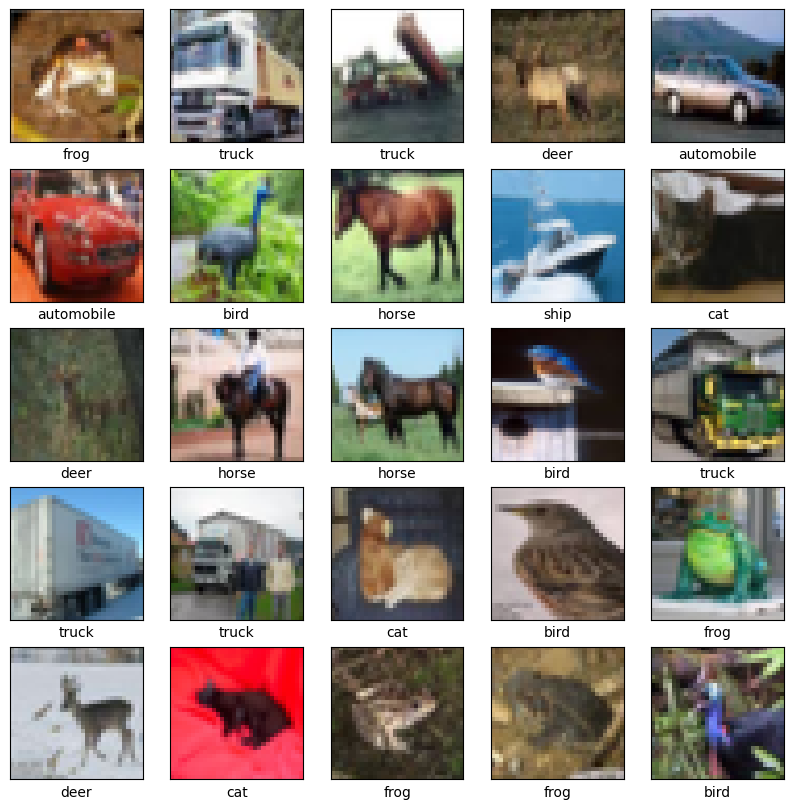

In [ ]:
plt.figure(figsize=[10,10])
for i in range (25):    # for first 25 images
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i][0]])

plt.show()

# Converting the pixels data to float type

In [ ]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')


# Standardizing (255 is the total number of pixels an image can have)

In [ ]:
train_images = train_images / 255
test_images = test_images / 255

# One hot encoding the target class (labels)

In [ ]:
num_classes = 10
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

# Creating a sequential model and adding layers to it


In [ ]:
model = Sequential()

model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))    # num_classes = 10

# Checking the model summary

In [ ]:
model.summary()




model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])


history = model.fit(train_images, train_labels, batch_size=64, epochs=100,
                    validation_data=(test_images, test_labels))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                        

# Loss curve

Text(0.5, 1.0, 'Loss Curves')

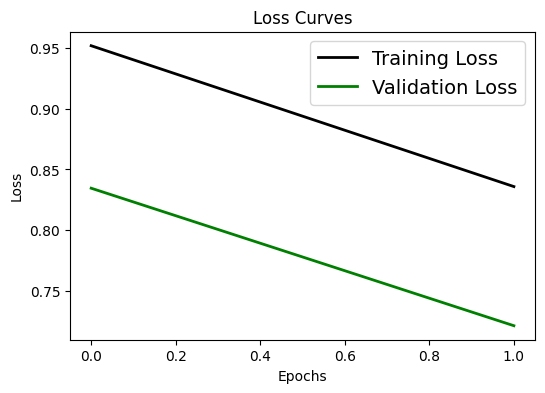

In [ ]:
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

# Accuracy curve

Text(0.5, 1.0, 'Accuracy Curves')

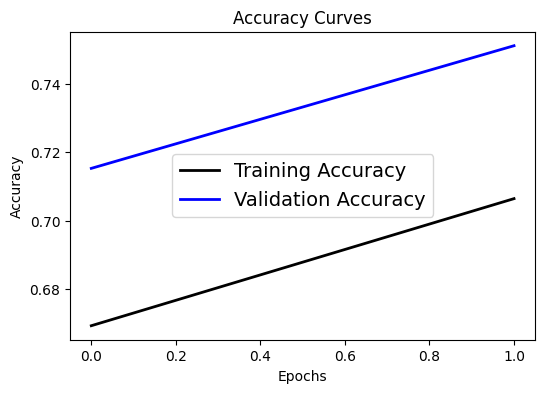

In [ ]:
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

# Making the Predictions

In [ ]:
pred = model.predict(test_images)
print(pred)

313/313 [==============================] - 20s 64ms/step
[[1.9509140e-04 1.6188844e-04 1.0282345e-03 ... 1.1444237e-03
  3.1774105e-03 1.3830820e-04]
 [1.2504031e-03 1.5327419e-02 5.7257776e-06 ... 4.1446785e-07
  9.8314309e-01 2.6729645e-04]
 [4.6444847e-03 4.0397976e-02 1.0297043e-04 ... 7.0543523e-05
  9.5220649e-01 2.3188286e-03]
 ...
 [9.3175840e-06 4.2566026e-06 5.6574837e-04 ... 9.3918946e-03
  7.3802762e-06 1.9131574e-05]
 [2.8119084e-01 1.7026539e-01 3.9798256e-02 ... 1.6703511e-02
  1.2007578e-03 5.1971967e-03]
 [3.6756487e-07 5.8796502e-07 3.3132452e-05 ... 9.8400670e-01
  4.1580527e-08 3.7064035e-07]]


# Converting the predictions into label index

In [ ]:
pred_classes = np.argmax(pred, axis=1)
print(pred_classes)

[3 8 8 ... 5 4 7]


# Plotting the Actual vs. Predicted results

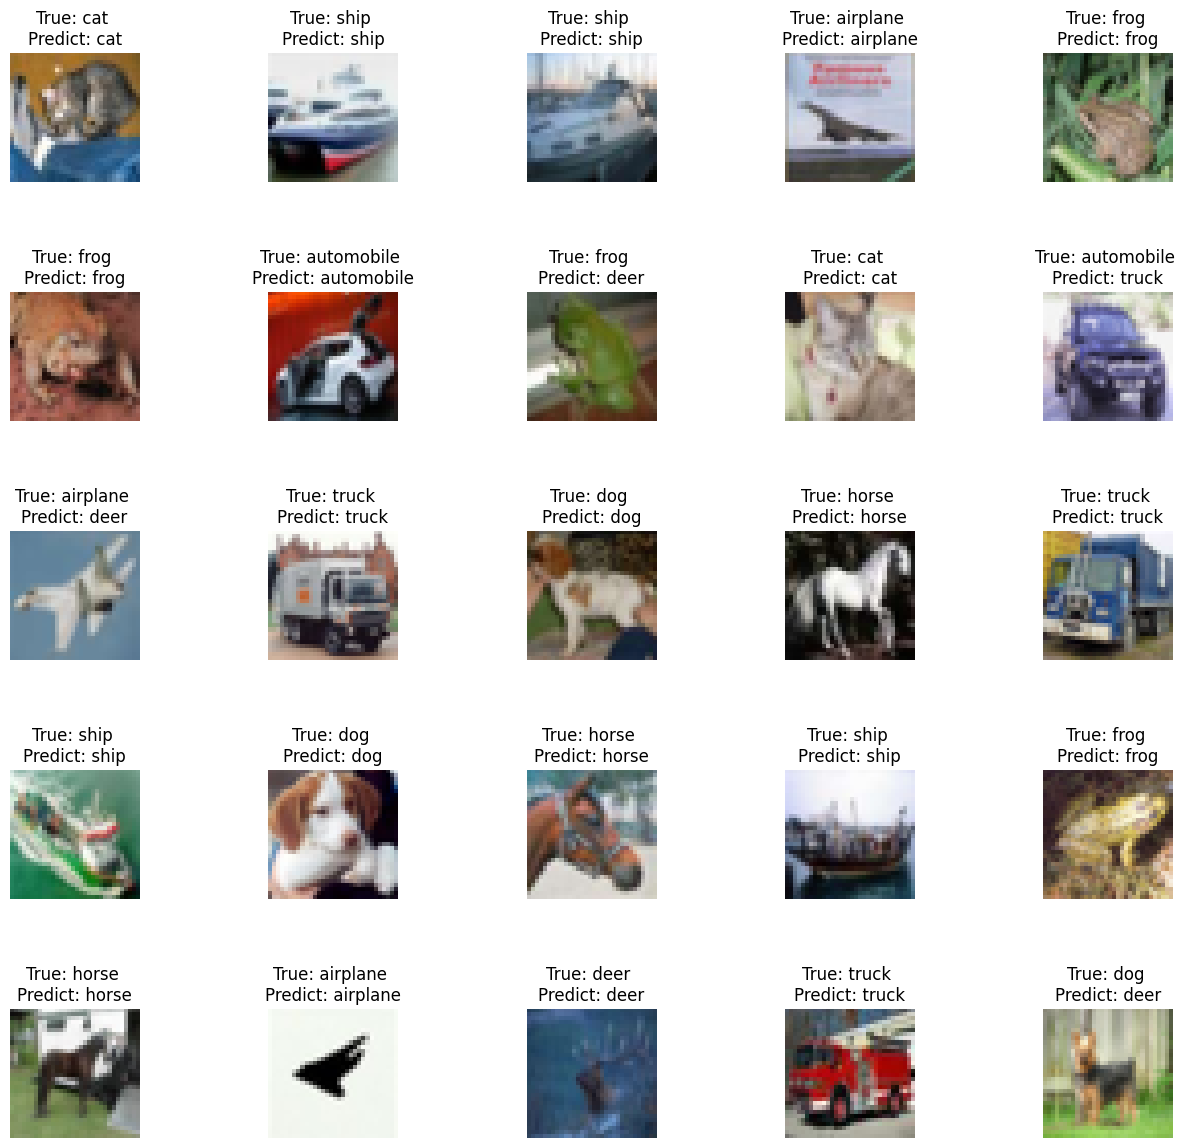

In [ ]:
fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(test_images[i])
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[np.argmax(test_labels[i])], class_names[pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)